<a href="https://colab.research.google.com/github/VAbhishek12/Book_Recomandation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
# warnings.filterwarnings('ignore')

In [ ]:
books = pd.read_csv('Books (1).csv', encoding='latin-1', low_memory=False)
users = pd.read_csv('Users (1).csv', encoding='latin-1', low_memory=False)
ratings = pd.read_csv('Ratings (1).csv', encoding='latin-1', low_memory=False)

In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books = books.fillna(value="Not Available")

In [ ]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
722121,174700,0201034557,0.0
722122,174700,0316666343,9.0
722123,174700,034073356X,0.0
722124,174700,0340733578,0.0


In [ ]:
ratings.dtypes

User-ID          int64
ISBN            object
Book-Rating    float64
dtype: object

In [ ]:
ratings["Book-Rating"].describe()

count    722125.000000
mean          2.979396
std           3.890986
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [ ]:
ratings["Book-Rating"] = ratings["Book-Rating"].fillna(0).astype(int)

In [ ]:
(ratings["Book-Rating"]==0).sum()

439786

(array([439786.,   1190.,   1703.,   3738.,   5620.,  32126.,  24151.,
         50140.,  67655.,  96017.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

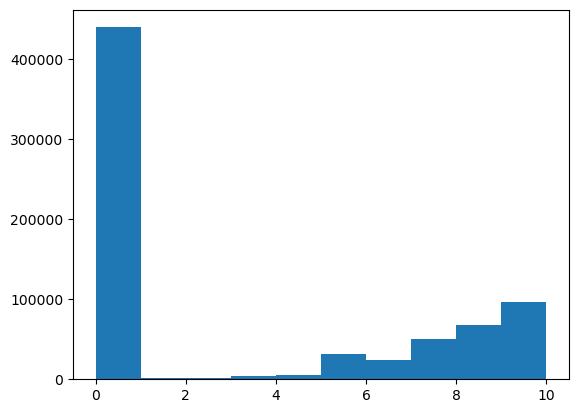

In [ ]:
plt.hist(ratings["Book-Rating"])

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
ratings.nunique()

User-ID         66774
ISBN           255687
Book-Rating        11
dtype: int64

In [ ]:
ratings["User-ID"].duplicated().sum()

655352

In [ ]:
## We will revome rows with 0 as ratings as these ratings are not present and will impact the recommendation system.

In [ ]:
ratings_filtered = ratings.drop(ratings[ratings["Book-Rating"]==0].index)

(array([ 1190.,  1703.,  3738.,  5620., 32126., 24151., 50140., 67655.,
        44720., 51297.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

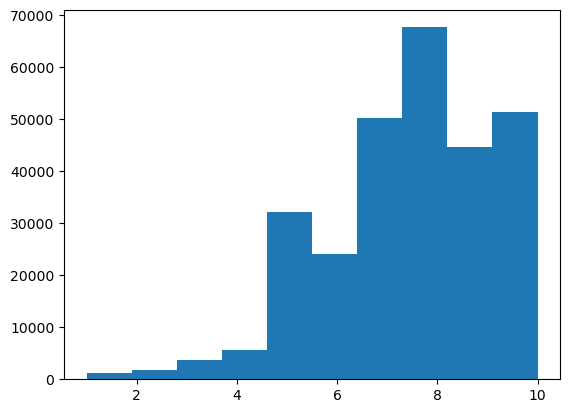

In [ ]:
plt.hist(ratings_filtered["Book-Rating"])

In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
users["Age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

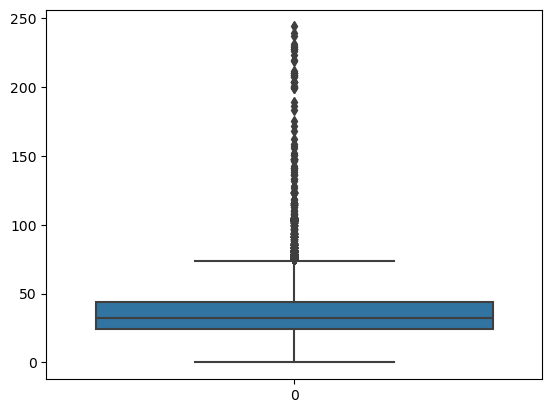

In [ ]:
sns.boxplot(users["Age"])
plt.show()


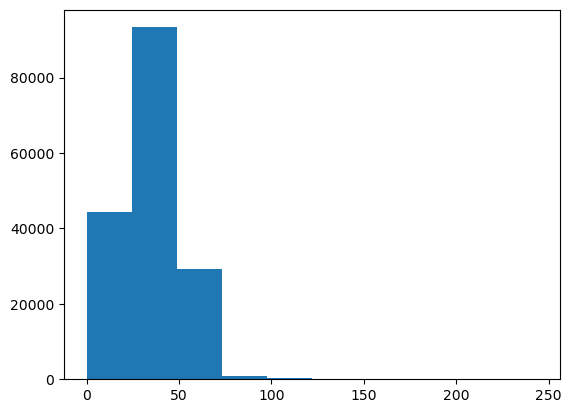

In [ ]:
plt.hist(users["Age"])
plt.show()

In [ ]:
## Calculating number of outliers in Age column

Q1 = users["Age"].quantile(0.25)
Q3 = users["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = users[(users["Age"] < lower_bound) | (users["Age"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers: {num_outliers}")
print("Outliers:")
print(outliers)

Number of outliers: 1084
Outliers:
        User-ID                                      Location    Age
220         221                      palm beach, florida, usa   79.0
689         690                      lake oswego, oregon, usa   80.0
957         958                           lindale, texas, usa   78.0
1147       1148                  prairie village, kansas, usa   79.0
1288       1289                     san jose, california, usa  103.0
...         ...                                           ...    ...
278301   278302      düsseldorf, nordrhein-westfalen, germany  104.0
278317   278318                  studio city, california, usa   77.0
278348   278349                           carlin, nevada, usa   76.0
278412   278413                    kansas city, missouri, usa   76.0
278471   278472  biel-benken bl/schweiz, alabama, switzerland   81.0

[1084 rows x 3 columns]


In [ ]:
## Box plot shows age outliers are greater than 75 but we can drop rows with age greater than 100.
users_filtered = users.drop(users[users["Age"]>100].index)
users_filtered

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users_filtered

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
## replacing all null values in age with mean 34.
users_filtered["Age"] = users_filtered["Age"].fillna(value="34")

In [ ]:
users_filtered["Age"] = users_filtered["Age"].astype(int)

In [ ]:
users_filtered.dtypes

User-ID      int64
Location    object
Age          int32
dtype: object

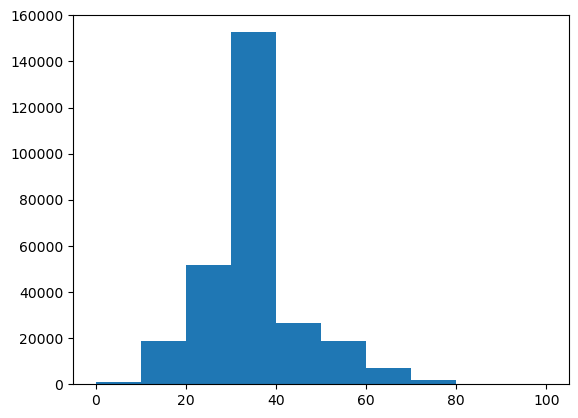

In [ ]:
plt.hist(users_filtered["Age"])
plt.show()

# Book Recommendations

### 1. Book Recommendation based on popularity

In [ ]:
## We try to find top 200 Books based on average ratings by users.

In [ ]:
books_rating = ratings_filtered.merge(books, on="ISBN")

In [ ]:
books_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
248844,174683,1579540252,8,Extraordinary Togetherness: A Woman's Guide Lo...,Sari Harrar,1999,St. Martin's Press,http://images.amazon.com/images/P/1579540252.0...,http://images.amazon.com/images/P/1579540252.0...,http://images.amazon.com/images/P/1579540252.0...
248845,174683,1880283174,8,Parenting Your 1-to-4-Year Old,Michael H. Popkin,1996,Active Parenting Publishers,http://images.amazon.com/images/P/1880283174.0...,http://images.amazon.com/images/P/1880283174.0...,http://images.amazon.com/images/P/1880283174.0...
248846,174684,044652705X,9,Companions in Courage : Triumphant Tales of He...,Pat LaFontaine,2000,Time Warner Trade Publishing,http://images.amazon.com/images/P/044652705X.0...,http://images.amazon.com/images/P/044652705X.0...,http://images.amazon.com/images/P/044652705X.0...
248847,174687,080211699X,5,Personal Velocity,Rebecca Miller,2001,Grove Press,http://images.amazon.com/images/P/080211699X.0...,http://images.amazon.com/images/P/080211699X.0...,http://images.amazon.com/images/P/080211699X.0...


In [ ]:
rating_count = books_rating.groupby("Book-Title").count()["Book-Rating"].reset_index()
rating_count.rename(columns={'Book-Rating':'Rating-Count'},inplace=True)
rating_count

,Book-Title,Rating-Count
0,A Light in the Storm: The Civil War Diary of ...,1
1,Dark Justice,1
2,Earth Prayers From around the World: 365 Pray...,3
3,Final Fantasy Anthology: Official Strategy Gu...,2
4,Flight of Fancy: American Heiresses (Zebra Ba...,1
...,...,...
102066,Ã?Â?berfall auf hoher See.,1
102067,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,1
102068,Ã?Â?rger mit Produkt X. Roman.,2
102069,Ã?Â?stlich der Berge.,1


In [ ]:
books_rating['Book-Rating'] = pd.to_numeric(books_rating['Book-Rating'], errors='coerce')

# Step 2: Drop rows with NaN values in 'Book-Rating'
books_rating = books_rating.dropna(subset=['Book-Rating'])

# Step 3: Ensure the column is numeric
books_rating['Book-Rating'] = books_rating['Book-Rating'].astype(float)

# Step 4: Group by 'Book-Title' and calculate the mean of 'Book-Rating'
ratings_avg = books_rating.groupby('Book-Title')['Book-Rating'].mean().reset_index()
ratings_avg.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

# Output the resulting DataFrame
print(ratings_avg)


                                               Book-Title  Average-Rating
0        A Light in the Storm: The Civil War Diary of ...        9.000000
1                                            Dark Justice       10.000000
2        Earth Prayers From around the World: 365 Pray...        8.666667
3        Final Fantasy Anthology: Official Strategy Gu...       10.000000
4        Flight of Fancy: American Heiresses (Zebra Ba...        8.000000
...                                                   ...             ...
102066                         Ã?Â?berfall auf hoher See.        7.000000
102067              Ã?Â?berleben in der WÃ?Â¼ste Danakil.        5.000000
102068                     Ã?Â?rger mit Produkt X. Roman.        7.000000
102069                              Ã?Â?stlich der Berge.        8.000000
102070                                  Ã?Â?thique en toc        8.000000

[102071 rows x 2 columns]


In [ ]:
popular = rating_count.merge(ratings_avg, on="Book-Title")
popular

,Book-Title,Rating-Count,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,Dark Justice,1,10.000000
2,Earth Prayers From around the World: 365 Pray...,3,8.666667
3,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
4,Flight of Fancy: American Heiresses (Zebra Ba...,1,8.000000
...,...,...,...
102066,Ã?Â?berfall auf hoher See.,1,7.000000
102067,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,1,5.000000
102068,Ã?Â?rger mit Produkt X. Roman.,2,7.000000
102069,Ã?Â?stlich der Berge.,1,8.000000


In [ ]:
popular.describe()

,Rating-Count,Average-Rating
count,102071.000000,102071.000000
mean,2.437999,7.582783
std,6.708038,1.705396
min,1.000000,1.000000
25%,1.000000,6.750000
50%,1.000000,8.000000
75%,2.000000,9.000000
max,456.000000,10.000000


In [ ]:
top_50 = popular[popular["Rating-Count"]>50].sort_values("Average-Rating", ascending=False).head(50)
top_50

,Book-Title,Rating-Count,Average-Rating
86751,"The Return of the King (The Lord of the Rings,...",64,9.390625
89756,"The Two Towers (The Lord of the Rings, Part 2)",91,9.307692
34086,Harry Potter and the Goblet of Fire (Book 4),141,9.021277
82701,The Little Prince,57,9.017544
34097,Harry Potter and the Prisoner of Azkaban (Book 3),163,8.993865
34104,Harry Potter and the Sorcerer's Stone (Book 1),109,8.981651
25892,Ender's Game (Ender Wiggins Saga (Paperback)),94,8.968085
34089,Harry Potter and the Order of the Phoenix (Boo...,129,8.961240
93196,To Kill a Mockingbird,171,8.953216
34107,Harry Potter and the Sorcerer's Stone (Harry P...,201,8.915423


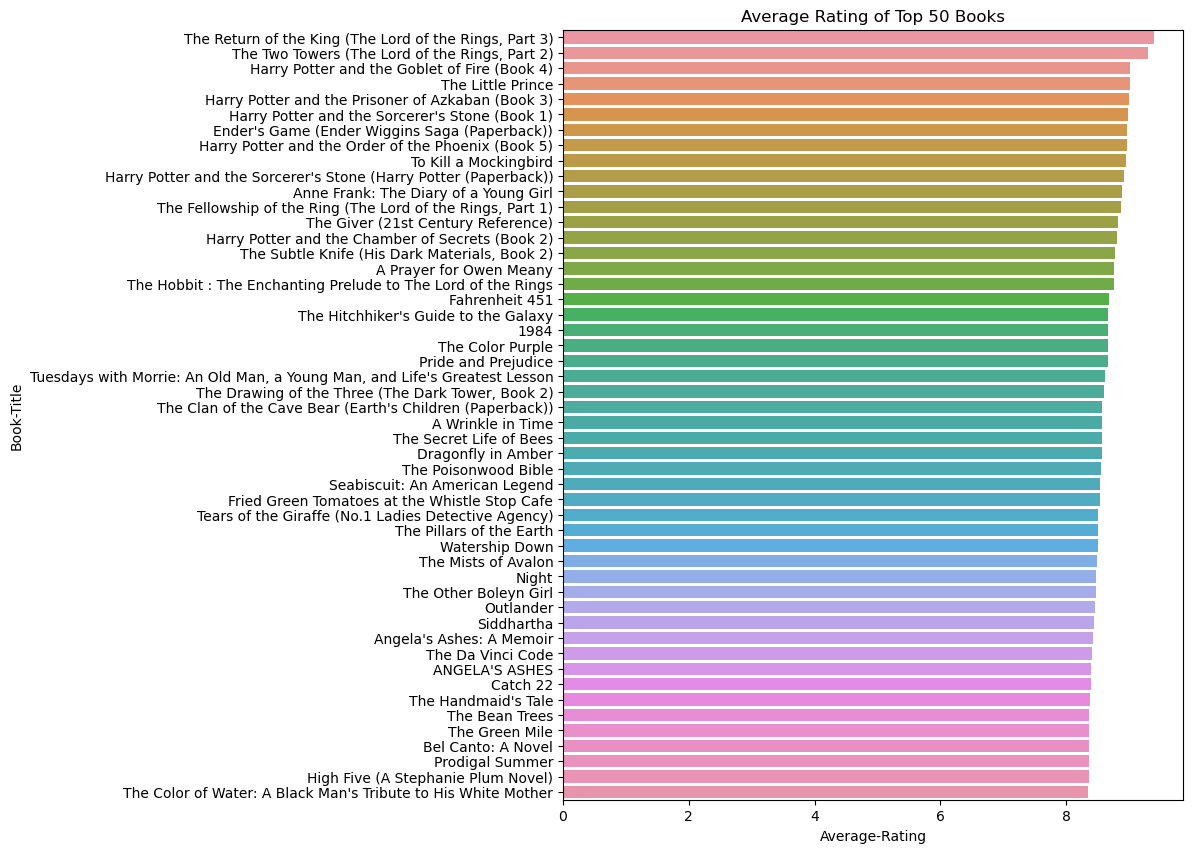

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x = top_50["Average-Rating"], y = top_50["Book-Title"])
plt.title('Average Rating of Top 50 Books')
plt.show()

#  Recommendation System based on Collaberative Filtering

In [ ]:
## We will create a table showing list of user id's and their respective Rating Count (Number of times a user has rated)

In [ ]:
books_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
248844,174683,1579540252,8.0,Extraordinary Togetherness: A Woman's Guide Lo...,Sari Harrar,1999,St. Martin's Press,http://images.amazon.com/images/P/1579540252.0...,http://images.amazon.com/images/P/1579540252.0...,http://images.amazon.com/images/P/1579540252.0...
248845,174683,1880283174,8.0,Parenting Your 1-to-4-Year Old,Michael H. Popkin,1996,Active Parenting Publishers,http://images.amazon.com/images/P/1880283174.0...,http://images.amazon.com/images/P/1880283174.0...,http://images.amazon.com/images/P/1880283174.0...
248846,174684,044652705X,9.0,Companions in Courage : Triumphant Tales of He...,Pat LaFontaine,2000,Time Warner Trade Publishing,http://images.amazon.com/images/P/044652705X.0...,http://images.amazon.com/images/P/044652705X.0...,http://images.amazon.com/images/P/044652705X.0...
248847,174687,080211699X,5.0,Personal Velocity,Rebecca Miller,2001,Grove Press,http://images.amazon.com/images/P/080211699X.0...,http://images.amazon.com/images/P/080211699X.0...,http://images.amazon.com/images/P/080211699X.0...


In [ ]:
a = books_rating.groupby("Book-Title").count()["Book-Rating"].reset_index()
a.rename(columns={'Book-Rating':'Rating-Count'},inplace=True)
a = a.sort_values("Rating-Count", ascending=False)

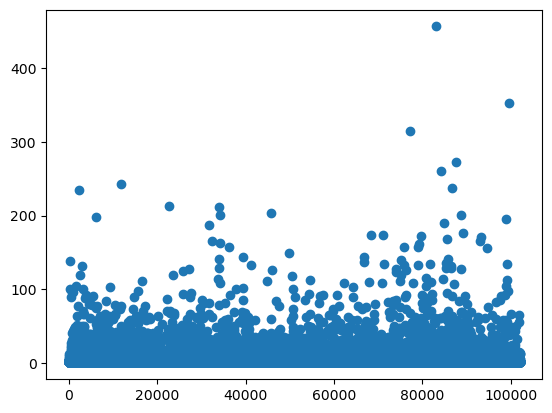

In [ ]:
plt.scatter(x = a.index, y=a["Rating-Count"])

In [ ]:
a[a["Rating-Count"]>1]

,Book-Title,Rating-Count
83017,The Lovely Bones: A Novel,456
99588,Wild Animus,352
77192,The Da Vinci Code,315
87566,The Secret Life of Bees,273
84332,The Nanny Diaries: A Novel,260
...,...,...
51402,Model Behaviour,2
51401,Model Behavior,2
18948,Das Restaurant Am Ende Des Universums (Fiction...,2
90298,The Vulnerable Observer: Anthropology That Bre...,2


In [ ]:
a

,Book-Title,Rating-Count
83017,The Lovely Bones: A Novel,456
99588,Wild Animus,352
77192,The Da Vinci Code,315
87566,The Secret Life of Bees,273
84332,The Nanny Diaries: A Novel,260
...,...,...
40404,Janice Larouche's Strategies for Women at Work,1
40402,Jangan Kau Menangis,1
40401,Janet and Jackie: The Story of a Mother and He...,1
40400,Janet Hamm Needs a Date for the Dance,1


In [ ]:
## We can see from above scatter plot that most of the users who have rated book are between 0-1000
## We also observe further at 90% of books that have been rated are between 1-10.
## Let us consider all userid's above 10 for our system. IE 6k User id's

In [ ]:
indexes = a.index
indexes

Index([ 83017,  99588,  77192,  87566,  84332,  11855,  86613,   2282,  22548,
        34080,
       ...
        40408,  40397,  40407,  40406,  40405,  40404,  40402,  40401,  40400,
       102070],
      dtype='int64', length=102071)

In [ ]:
high_rated_users = books_rating[books_rating.index.isin(indexes)]
high_rated_users

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
102066,148220,3499221489,10.0,Heimkehr.,Rosamunde Pilcher,1997,Rowohlt Tb.,http://images.amazon.com/images/P/3499221489.0...,http://images.amazon.com/images/P/3499221489.0...,http://images.amazon.com/images/P/3499221489.0...
102067,11676,3499224577,7.0,Die Verzauberung der Lily Dahl.,Siri Hustvedt,1999,Rowohlt Tb.,http://images.amazon.com/images/P/3499224577.0...,http://images.amazon.com/images/P/3499224577.0...,http://images.amazon.com/images/P/3499224577.0...
102068,11676,3499227002,4.0,Das Magazin.,Hellmuth Karasek,2000,Rowohlt Tb.,http://images.amazon.com/images/P/3499227002.0...,http://images.amazon.com/images/P/3499227002.0...,http://images.amazon.com/images/P/3499227002.0...
102069,28735,3499227002,3.0,Das Magazin.,Hellmuth Karasek,2000,Rowohlt Tb.,http://images.amazon.com/images/P/3499227002.0...,http://images.amazon.com/images/P/3499227002.0...,http://images.amazon.com/images/P/3499227002.0...


In [ ]:
b = high_rated_users.groupby("User-ID").count()["Book-Rating"].reset_index()
b.rename(columns={'Book-Rating':'Rating-Count'},inplace=True)
b= b.sort_values("Rating-Count", ascending=False)
b

,User-ID,Rating-Count
2719,11676,6630
15218,98391,557
3403,16795,322
1747,7346,314
23318,153662,313
...,...,...
12472,78682,1
12470,78659,1
12469,78637,1
12468,78634,1


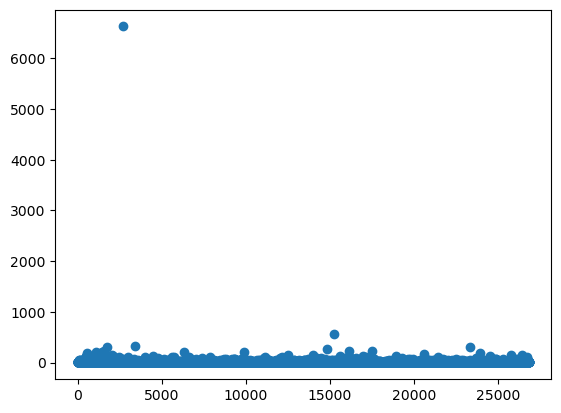

In [ ]:
plt.scatter(x = b["User-ID"].index, y = b["Rating-Count"])

In [ ]:
b

,User-ID,Rating-Count
2719,11676,6630
15218,98391,557
3403,16795,322
1747,7346,314
23318,153662,313
...,...,...
12472,78682,1
12470,78659,1
12469,78637,1
12468,78634,1


In [ ]:
b[b["Rating-Count"]>1]

,User-ID,Rating-Count
2719,11676,6630
15218,98391,557
3403,16795,322
1747,7346,314
23318,153662,313
...,...,...
23015,151634,2
22985,151470,2
8705,52631,2
8732,52847,2


In [ ]:
## In the above filtering we observe that out of 1.35L books there are around 47k books which have been rated more than
## just once. So we will use all books which have been rated more than onece.

In [ ]:
books_indexes = b[b["Rating-Count"]>1].index
#books_indexes = b.index

In [ ]:
high_rated_books = books_rating[books_rating.index.isin(books_indexes)]
high_rated_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
3,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
5,16877,038550120X,9.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
8,21340,038550120X,9.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
10,22625,038550120X,10.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
26807,2288,0553210092,5.0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...
26809,6251,0553210092,7.0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...
26810,7769,0553210092,5.0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...
26813,16634,0553210092,8.0,The Scarlet Letter,NATHANIEL HAWTHORNE,1965,Bantam,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...,http://images.amazon.com/images/P/0553210092.0...


In [ ]:
pt = high_rated_books.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

In [ ]:
pt.fillna(0, inplace=True)

In [ ]:
pt

User-ID,8,12,14,16,17,26,32,42,44,51,...,278825,278828,278831,278832,278843,278844,278849,278851,278852,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
01-01-00: A Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Best-Loved Poems (Dover Thrift Editions),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Experiments in the Philosophy of Everyday Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Your Finances in Changing Times (The Christian Financial Concepts Series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen &amp; the Art of the Macintosh : Discoveries on the Path to Computer Enlightenment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
pt.dtypes

User-ID
8         float64
12        float64
14        float64
16        float64
17        float64
           ...   
278844    float64
278849    float64
278851    float64
278852    float64
278854    float64
Length: 6255, dtype: object

In [ ]:
s_score = cosine_similarity(pt)

In [ ]:
sorted(list(enumerate(s_score[0])), key=lambda x:x[1], reverse=True)[1:6]

[(1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0)]

In [ ]:
pt.to_csv('pt.csv',index = True)

In [ ]:
pt.to_pickle("pt.pkl")

### Below is function which recommends 5 books when a user enters a book.

In [ ]:
def recommend(book_name):
    try:
        ind = np.where(pt.index==book_name)[0][0]
        similar_books = sorted(list(enumerate(s_score[ind])), key=lambda x:x[1], reverse=True)[1:6]
        for i in similar_books:
            print(pt.index[i[0]])
    except IndexError:
        print("No Recommendations found for this book")


In [ ]:
recommend("Year In Provence")

01-01-00: A Novel of the Millennium
01-01-00: The Novel of the Millennium
100 Best-Loved Poems (Dover Thrift Editions)
101 Dalmatians
101 Experiments in the Philosophy of Everyday Life


In [ ]:
## We go ahead and try with some other models.

# Recommendation using Google tensorflow

In [ ]:
pip install -q tensorflow-recommenders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -q --upgrade tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [ ]:
import tensorflow_recommenders as tfrs

In [ ]:
## First we have to convert pandas dataframe to a tensorflow dataset. For that we will take only numerical features.

In [ ]:
## From ratings dataset we will take user-id's and ISBN

In [ ]:
## From Books database we will take only ISBN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = books_rating[["User-ID", "ISBN", "Book-Rating"]]

In [ ]:
df.head(25)

,User-ID,ISBN,Book-Rating
0,276726,0155061224,5.0
1,276729,052165615X,3.0
2,276729,0521795028,6.0
3,276744,038550120X,7.0
4,11676,038550120X,10.0
5,16877,038550120X,9.0
6,17975,038550120X,6.0
7,20806,038550120X,6.0
8,21340,038550120X,9.0
9,21356,038550120X,7.0


In [ ]:
user_ids = df['User-ID'].unique().tolist()
item_ids = df['ISBN'].unique().tolist()

In [ ]:
user_to_index = {user: idx for idx, user in enumerate(user_ids)}
item_to_index = {item: idx for idx, item in enumerate(item_ids)}

In [ ]:
df['user'] = df['User-ID'].map(user_to_index)
df['item'] = df['ISBN'].map(item_to_index)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11152\1376235887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['User-ID'].map(user_to_index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11152\1376235887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item'] = df['ISBN'].map(item_to_index)


In [ ]:
# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Create TensorFlow Dataset objects
def df_to_tensor(df):
    return tf.data.Dataset.from_tensor_slices((
        (df['user'].values, df['item'].values),
        df['Book-Rating'].values
    )).shuffle(1000).batch(256)

In [ ]:
train_data = df_to_tensor(train_df)
test_data = df_to_tensor(test_df)

In [ ]:
# Building the Model
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50):
        super(RecommenderNet, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_size)
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_size)
        self.dot = tf.keras.layers.Dot(axes=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[0])
        item_vector = self.item_embedding(inputs[1])
        return self.dot([user_vector, item_vector])

In [ ]:
num_users = len(user_ids)
num_items = len(item_ids)
model = RecommenderNet(num_users, num_items)

In [ ]:
#  Compiling the Model
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1), loss='mse')

In [ ]:
# Train the Model
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 61.9486 - val_loss: 61.7281
Epoch 2/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 61.9094 - val_loss: 61.7274
Epoch 3/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 61.8708 - val_loss: 61.7238
Epoch 4/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 61.7194 - val_loss: 61.7025
Epoch 5/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - loss: 61.0152 - val_loss: 61.5918
Epoch 6/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 58.9434 - val_loss: 61.3141
Epoch 7/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 57.5178 - val_loss: 60.9149
Epoch 8/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - loss: 56.5783 - val_loss: 60.2861
Epoch 9/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - loss: 55.1796 - val_loss: 59.3609
Epoch 10/10
778/778 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - loss: 53.2169 - val_loss: 58.1114


In [ ]:
df["ISBN"].str.contains(r'[a-zA-Z]').sum()

20527

In [ ]:
# df.drop(df.loc[df["ISBN"].str.contains(r'[a-zA-Z]')].index, inplace=True)

In [ ]:
df.to_csv('df_for_tf.csv', index=False)
books.to_csv('df_books.csv', index=False)

In [ ]:
#  Make Predictions
# For a specific user, get recommendations
user_index = user_to_index[16877]  # For example, user_id = 1
item_indices = np.array(list(item_to_index.values()))

user_item_pairs = np.array([[user_index, item] for item in item_indices])
predicted_ratings = model.predict([user_item_pairs[:, 0], user_item_pairs[:, 1]])

recommended_items = {item_ids[item]: predicted_ratings[idx][0] for idx, item in enumerate(item_indices)}
recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)

top_5_recommended_items = recommended_items[:5]

print("Top 5 recommended items for user:")
for item, rating in top_5_recommended_items:
    print(f"Item {item}: {rating}")

3509/3509 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step
Top 5 recommended items for user:
Item 0452282152: 0.642453134059906
Item 0446310786: 0.6357842087745667
Item 0786868716: 0.624050498008728
Item 0446672211: 0.6045031547546387
Item 0316601950: 0.5978293418884277


In [ ]:
top_5_recommended_items[1][0]

'0446310786'

In [ ]:
for item, rating in top_5_recommended_items:
    print(item)

0452282152
0446310786
0786868716
0446672211
0316601950


In [ ]:
books["Book-Title"][books["ISBN"]==top_5_recommended_items[0][0]]

231    Girl with a Pearl Earring
Name: Book-Title, dtype: object

In [ ]:
Recommended_books = books["Book-Title"][books["ISBN"]==top_5_recommended_items[0][0]]
Recommended_books

231    Girl with a Pearl Earring
Name: Book-Title, dtype: object

In [ ]:
def recomm_books (recommended_items):
    for item in recommended_items:
    #    print(db_books["Book-Title"][db_books["ISBN"]==item[0]])
        print(books.loc[books['ISBN'] == item[0], 'Book-Title'].values[0])

In [ ]:
# recomm_books(top_5_recommended_items)

In [ ]:
def book_recommendation(userid):
    user_index = user_to_index[userid]  # For a specific user id.
    item_indices = np.array(list(item_to_index.values()))

    user_item_pairs = np.array([[user_index, item] for item in item_indices])
    predicted_ratings = model.predict([user_item_pairs[:, 0], user_item_pairs[:, 1]])

    recommended_items = {item_ids[item]: predicted_ratings[idx][0] for idx, item in enumerate(item_indices)}
    recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)

    top_5_recommended_items = recommended_items[:5]

    print("Top 5 recommended books for this user:")
    for item in top_5_recommended_items:
        print(books.loc[books['ISBN'] == item[0], 'Book-Title'].values[0])

In [ ]:
np.array([[12, item] for item in np.array(list(item_to_index.values()))])

array([[    12,      0],
       [    12,      1],
       [    12,      2],
       ...,
       [    12, 112273],
       [    12, 112274],
       [    12, 112275]])

In [ ]:
book_recommendation(31315)

3509/3509 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step
Top 5 recommended books for this user:
Where the Heart Is (Oprah's Book Club (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
The Pilot's Wife : A Novel
Harry Potter and the Prisoner of Azkaban (Book 3)
The Secret Life of Bees


In [ ]:
#model.save('book_recommendation_model', save_format="tf")
#model.save('book_recommendation_model_1.h5')
# Save the model in Keras format
model.save('book_recommendation_model_1.keras')


AttributeError: 'NoneType' object has no attribute 'save'

# Deploying the Model

In [ ]:
import streamlit as st
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import pickle